<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 131.8 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [16]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [20]:
## Write your code here
# The column Employment has no missing values
df.dropna(subset='RemoteWork', axis=0, inplace=True) # Dropping NA makes more sense here as most of these values are missing because are from student or people without a job by the moment. So filling would lead to a bias
df.dropna(subset='JobSat', axis=0, inplace=True) # Dropping NA here also makes more sense as filling with either the mean or the mode would lead to a high job satisfaction, not actually 

missing_data = df.isnull()
for column in ['JobSat', 'RemoteWork']:
    print(df[column].value_counts())
    print(missing_data[column].value_counts())
    print('')



JobSat
8.0     7506
7.0     6376
6.0     3751
9.0     3624
10.0    2250
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64
JobSat
False    29117
Name: count, dtype: int64

RemoteWork
Hybrid (some remote, some in-person)    12622
Remote                                  11103
In-person                                5392
Name: count, dtype: int64
RemoteWork
False    29117
Name: count, dtype: int64



#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


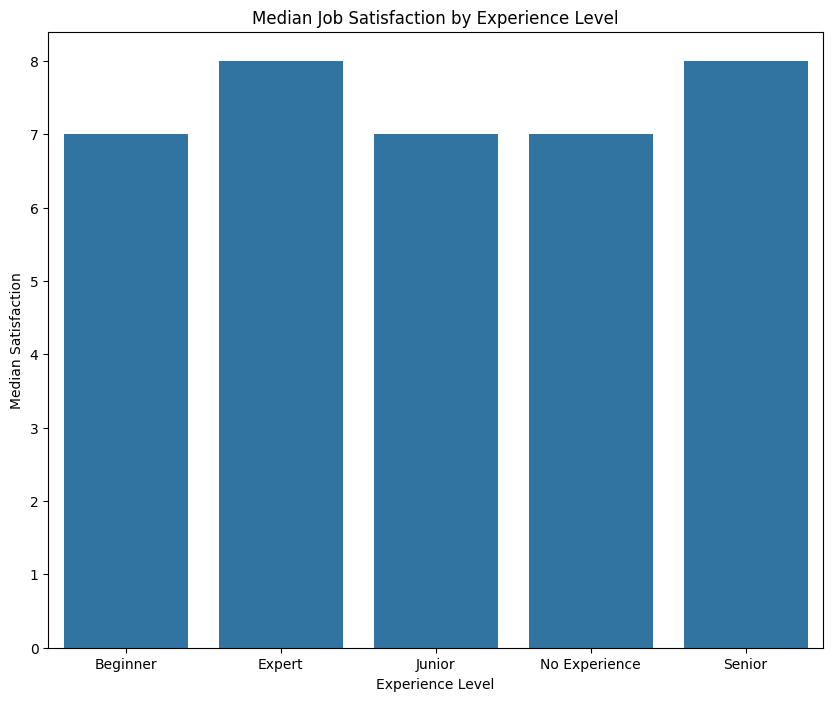

In [35]:
## Write your code here
# df['YearsCodePro'].value_counts()

def clean_experience(x):
    if pd.isna(x):
        return 0
    elif x == 'Less than 1 year':
        return 1
    elif x == 'More than 50 years':
        return 51
    else:
        return int(x)

df['YearsCodeNum'] = df['YearsCodePro'].apply(clean_experience)

def categorize_exp(years):
    if years == 0:
        return 'No Experience'
    elif (years) <= 5:
        return 'Beginner'
    elif years <= 10:
        return 'Junior'
    elif years <= 20:
        return 'Senior'
    else:
        return 'Expert'

df['ExpLvl'] = df['YearsCodeNum'].apply(categorize_exp)

# df['ExpLvl'].head()

median_df = df.groupby('ExpLvl', as_index=False)['JobSat'].median()

# Bar plot
plt.figure(figsize=(10,8))
sns.barplot(data=median_df, x='ExpLvl', y='JobSat')
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


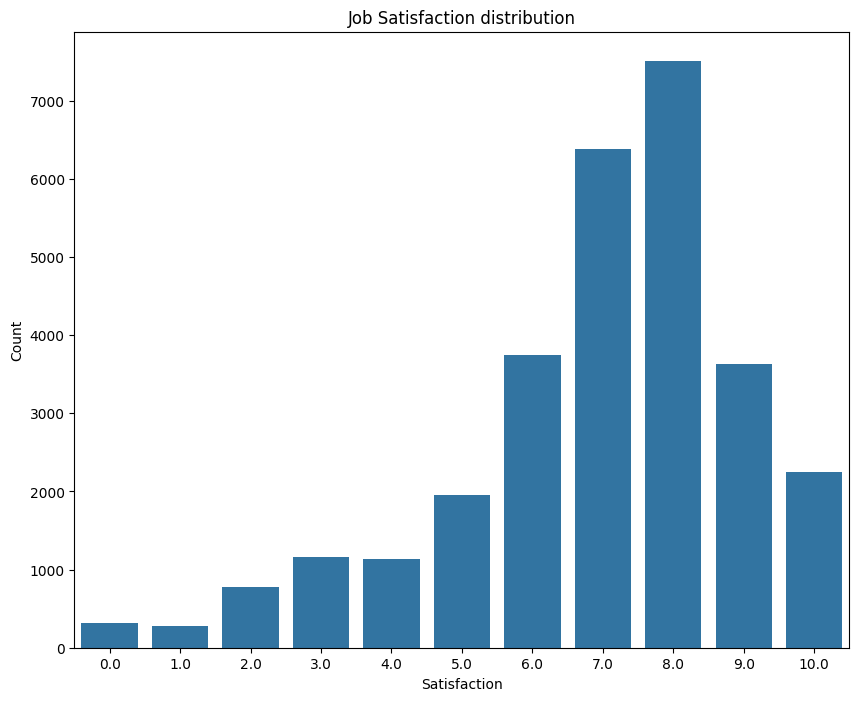

In [22]:
## Write your code here
plt.figure(figsize=(10,8))
sns.countplot(x='JobSat', data=df)
plt.title("Job Satisfaction distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


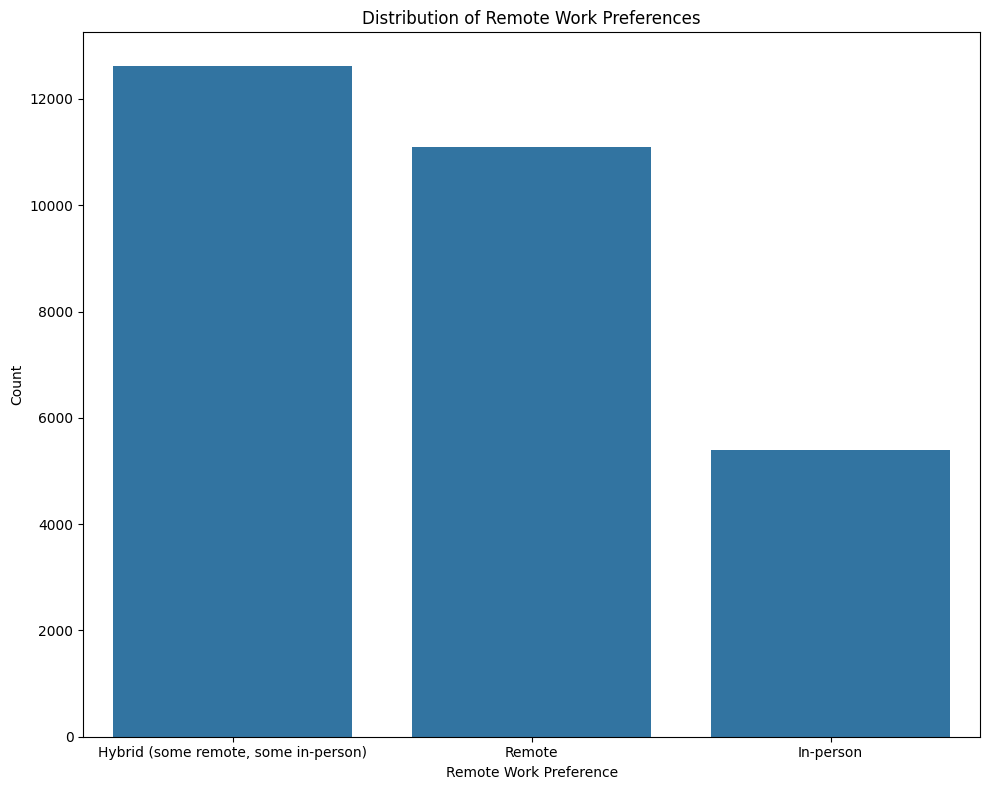

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",10006,4490,8038
"Employed, full-time;Employed, part-time",49,18,60
"Employed, full-time;Independent contractor, freelancer, or self-employed",829,235,1227
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",53,9,55
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work",0,2,0
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",0,0,1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time",44,11,36
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time",3,2,2
"Employed, full-time;Not employed, and not looking for work",0,1,0


In [40]:
## Write your code here
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

remote_job_role_ct = pd.crosstab(index=df['Employment'], columns=df['RemoteWork'])
remote_job_role_ct.head(10)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


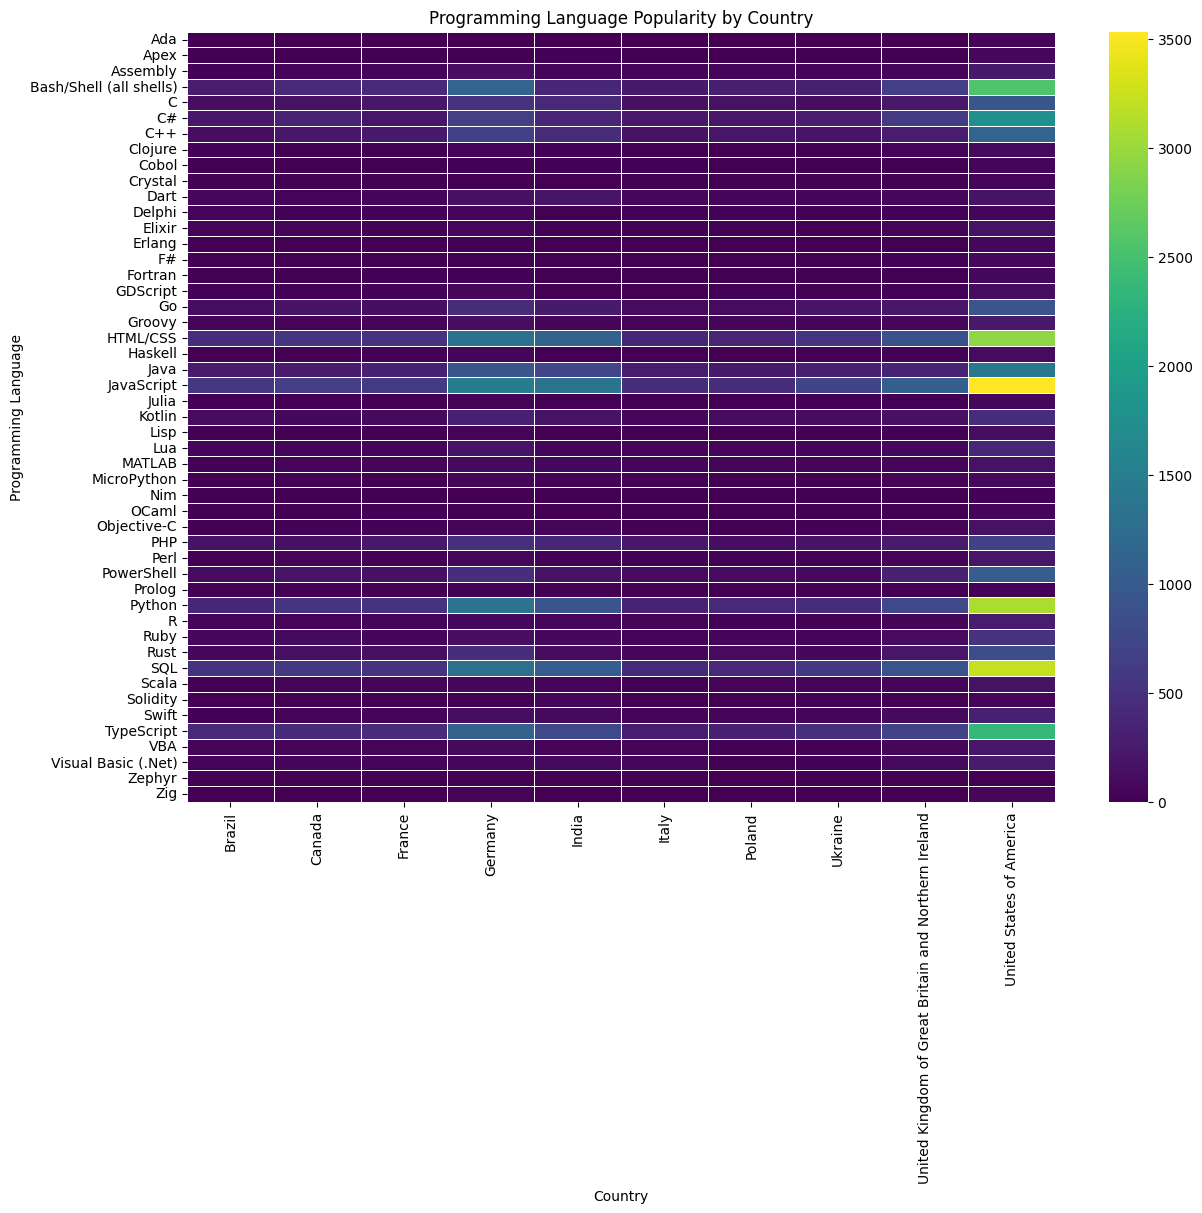

In [53]:
## Write your code here
df_new = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_new = df_new.assign(Language=df_new['LanguageHaveWorkedWith'].str.split(';'))
df_new = df_new.explode('Language')

language_counts = df_new.groupby(['Country', 'Language']).size().reset_index(name='Count')
top_countries = df_new['Country'].value_counts().head(10).index.tolist()
lang_counts_top = language_counts[language_counts['Country'].isin(top_countries)]

lang_pivot = lang_counts_top.pivot(index='Language', columns='Country', values='Count').fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(lang_pivot, cmap='viridis', annot=False, linewidths=.5)
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


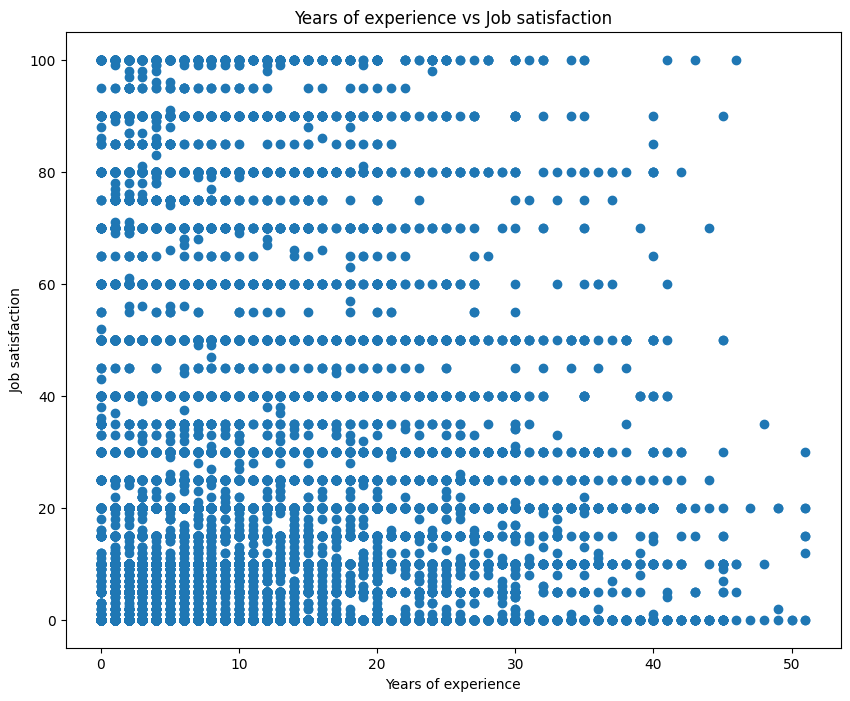

In [61]:
## Write your code here
df['JobSatPoints_1_num'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')
df_clean = df.dropna(subset=['YearsCodeNum', 'JobSatPoints_1_num'])

plt.figure(figsize=(10, 8))
plt.scatter(y=df_clean['JobSatPoints_1_num'], x=df_clean['YearsCodeNum'])
plt.title('Years of experience vs Job satisfaction')
plt.xlabel('Years of experience')
plt.ylabel('Job satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [65]:
## Write your code here
df_new1 = df[['Employment', 'EdLevel']].dropna()
df_new1 = df_new1.assign(Employment_dis=df_new1['Employment'].str.split(';'))
df_new1 = df_new1.explode('Employment_dis')

df_new1 = df_new1.groupby(['Employment_dis', 'EdLevel']).size().reset_index(name='Count')

crosstab = pd.crosstab(df_new1['EdLevel'], df_new1['Employment_dis'], normalize='index')  # Row-wise % (per EdLevel)
crosstab


Employment_dis,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
Primary/elementary school,0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.166667,0.166667,0.166667,0.000,0.166667,0.000,0.166667,0.166667
Some college/university study without earning a degree,0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000
Something else,0.125000,0.125000,0.125000,0.125,0.125000,0.125,0.125000,0.125000


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('Analyzed_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
